Evaluación de metricas de desempeño en machine learning

En el campo del machine learning, la evaluación de metricas de desempeño es una tarea critica para la evaluación del rendimiento de los modelos de aprendizaje automtico. En este taller, aprenderemos lospasos a seguir para evaluar el desempeño de un modelo e clasificación usando la libreria scikit-learn de python.


Paso 1: Cargar los datos

Lo primero que debemos hacer es cargar los datos en nuestro notebook de Jupyter. Para este tutorial, usaremos el conjunto de datos de flores iris de la libreria-learn. para cargr estos datos, necesitaremos importar el conjunto de datos y separar los atributos de las etiquetas.

si no ha instalado la libreria scikit-learn, con este comando puede hacerlo, tenga en cuenta que se debe ejecutar en una celda python.

In [2]:
pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [4]:
# importar la libreria
from sklearn.datasets import load_iris

# cargar los datos
iris = load_iris()

# Separar los atributos y etiquetas
X = iris.data
y = iris.target

Paso 2: Dividir los datos en conjuntos de entrenamiento y prueba

Una vez que hemos cargado nuestros datos, debemos dividirlos en conjuntos de entrenamiento y prueba. Usaremos el conjunto de entrenamiento para entrenar nuestro modelo y el conjunto de prueba para evaluar su desempeño

In [5]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Paso 3: Entrenar un modelo de clasificacion

Una vez que hemos dividido nuestros datos en conjuntos de entrenamiento y prueba, debemos entrenar un modelo de clasificción. Usaremos el algoritmo de clasificación de vecinos mas cercanos (KNN) en ese ejemplo.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Crear un clasificador KNN con 3 vecinos
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el clasificador en el conjunto de entrenamiento
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Paso 4: Evaluar el modelo en el conjunto de prueba

Una vez que hemos entrenado nuestro modelo, podemos evaluar su desempeño en el conjunto de prueba. Usaremos la función score del clasificador KNN para calcular la precisión del modelo en el conjunto de prueba.

In [7]:
# Evaluar la precisión del modelo en el conjunto de prueba
accuracy = knn.score(X_test, y_test)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 1.0


Paso 5: Calcular otras metricas de desempeño

Ademas de la precisión, existen otras metricas de desempeño que podemos calcular para evaluar nuestro modelo. Algunas de estas metricas incluyen la sensibilidad, la especificidad, la precisión y el puntaje F1. Usaremos la función classification_report de la libreria scikit-learn para calcular estas metricas.

In [9]:
from sklearn.metrics import classification_report

# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular las metricas de desempeño
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



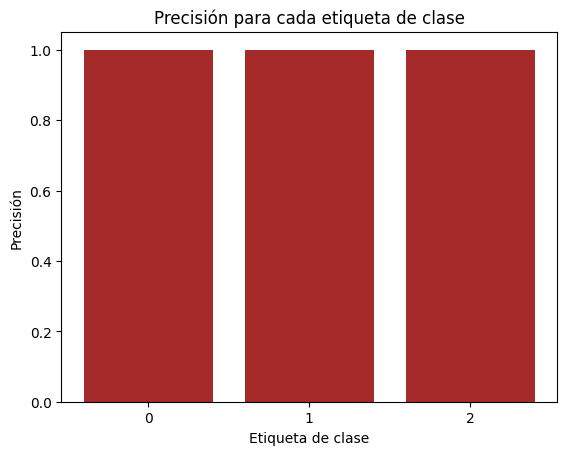

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Prdecir las etiuetas para el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular las metricas de desempeño - informe de clasificación
report = classification_report(y_test, y_pred, output_dict=True)

# Crear una lista de las etiquetas de clase
labels = [str(label) for label in knn.classes_]

# Crear una lista de los valores de precisión para cada etiqueta de clase
precision = [report[label]['precision'] for label in labels]

# Crear un grafica de brras para visualizar las prcisiones para cada etiqueta de clase
fig, ax = plt.subplots()
ax.bar(labels, precision, color = 'brown')
ax.set_title('Precisión para cada etiqueta de clase')
ax.set_xlabel('Etiqueta de clase')
ax.set_ylabel('Precisión')
plt.show()

Paso 6: Ajustar el modelo y volver a evaluar

Si no estamos satisfechos con el desempeño del modelo, podemos ajustarlo y volver a evlular su desempeño en el conjunto de prueba. Por ejemplo, podemos ajustar el numero de vecinos en el clasificador KNN y volver a evalular su precisión.

In [11]:
# Crear un clasificador de KNN con 5 vecinos
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el clasificador en el conjunto de entrenamiento
knn.fit(X_train, y_train)

#Evaluar la precisión del modelo en el conjunto de prueba
accuracy = knn.score(X_test, y_test)
print("Precisión del modelo:", accuracy)
#

Precisión del modelo: 1.0


Paso 7: Guardar el modelo entrenado

Una vez que estamos satisfechos con el desempeño del modelo, podemos guardarlo en un archivo para su uso posterior.
Usaeremos la libreria pickle para guardar nuestro modelo en un archivo.

In [12]:
import pickle

# Guardar el modelo en un archivo
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

In [13]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Cargar el dataset de iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Definir la estrategia de validación cruzada
cv = 5

# Definir la metrica de evaluación
scoring = 'accuracy'

# Realizar la validación cruzada y obtener las puntuaciones de precisión
scores = cross_val_score(clf, X, y, cv=cv, scoring=scoring)

# Calcular la puntuación media
mean_score = scores.mean()

# Imprimir la puntuación media
print("Puntuaciones de la validación cruzada:", scores)
print("Puntuación media de la validación cruzada:", mean_score)

Puntuaciones de la validación cruzada: [0.96666667 0.96666667 0.9        1.         1.        ]
Puntuación media de la validación cruzada: 0.9666666666666668
